# Homework 7

Consider the two initial value problems (IVPs)

I.  $$\frac{du}{dt} = \frac{t^2}{u^2}$$
with initial condition $u(0) = 2$.  Note: this equation is separable ( https://en.wikipedia.org/wiki/Separation_of_variables ).

II. $$t^2\frac{du}{dt} +tu = 1$$
with initial condition $u(1) = 2$.  Note: this equation is linear and has an integrating factor of $t$ ( https://en.wikipedia.org/wiki/Integrating_factor ).

## Problem 1 (4 points)

Use forward Euler to solve IVP I and IVP II, for each using 3 step sizes and time domain that illustrate the convergence.  Plot the approximate solutions against the true solutions (which you may need to remember how to find from Calc II or the equivalent), and compute the 2-norm errors for each. 


In [100]:
function FE(f,t,U,h) # Take one step of forward Euler for u'(t) = f(t,u(t)) with step-size h
    return U + h*f(t,U)
end

FE (generic function with 1 method)

In [101]:
function FERE(f,a,b,u_0,h)
    n = ceil(Int64, (b-a)/h)
    R = zeros(n)  # initialize the output array R
    t = zeros(n)  # initialize the output array t
    t[1] = a # set the initial time
    R[1] = u_0 # set the initial solution value
    
    for j = 2:n
        D_h = FE(f,t[j-1],R[j-1],h/2) # Here we use D to denote the solution from taking two steps
        D_h = FE(f,t[j-1]+h/2,D_h,h/2) # Begin the second step at the midpoint of the time interval
        S_h = FE(f,t[j-1],R[j-1],h)
        R[j] = 2*D_h - S_h
        t[j] = t[j-1] + h
    end
    return t, R
end

FERE (generic function with 1 method)

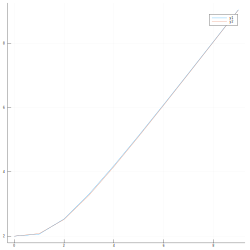

In [102]:
using Plots
u(t) = (t^3+8)^(1/3) #true solution
uprime(t,u)=(t^2)/(u^2)
t, R = FERE(uprime,0,10,2,1)
plot(t,R,size=(1000,1000))
plot!(t,u,size=(1000,1000))

In [103]:
vecnorm(u.(t)-R)

0.06707759361497136

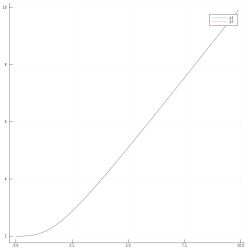

In [104]:
using Plots
t, R = FERE(uprime,0,10,2,0.1)
plot(t,R,size=(1000,1000))
plot!(t,u,size=(1000,1000))

In [105]:
vecnorm(u.(t)-R)

0.00138071865363954

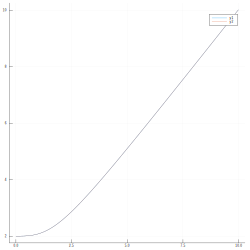

In [106]:
using Plots
t, R = FERE(uprime,0,10,2,0.01)
plot(t,R,size=(1000,1000))
plot!(t,u,size=(1000,1000))

In [107]:
vecnorm(u.(t)-R)

4.205293818537679e-5

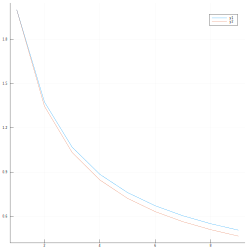

In [108]:
using Plots
u2(t) = (log.(t)+2)/t #true solution
u2prime(t,u)=(1-t*u2(t))/(t^2)
t, P = FERE(u2prime,1,10,2,1)
plot(t,P,size=(1000,1000))
plot!(t,u2,size=(1000,1000))

In [109]:
vecnorm(u2.(t)-P)

0.10756004910510684

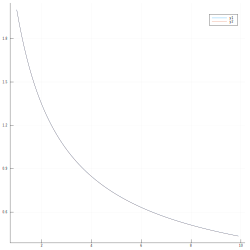

In [110]:
using Plots
t, W = FERE(u2prime,1,10,2,0.1)
plot(t,W,size=(1000,1000))
plot!(t,u2,size=(1000,1000))

In [111]:
vecnorm(u2.(t)-W)

0.003596347138013017

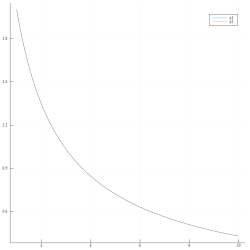

In [112]:
using Plots
t, Q = FERE(u2prime,1,10,2,0.01)
plot(t,Q,size=(1000,1000))
plot!(t,u2,size=(1000,1000))

In [113]:
vecnorm(u2.(t)-Q)

0.00011399570701553467

## Problem 2 (4 points)

Use backward Euler to solve IVP I and IVP II, for each using 3 step sizes and time domain that illustrate the convergence.  Plot the approximate solutions against the true solutions (which you may need to remember how to find from Calc II or the equivalent), and compute the 2-norm errors for each. 

In [114]:
function fpi(F,x,ε)    
    if (x - F(x)) < ε
        return x
    else
        fpi(F,F(x),ε)
    end
end

fpi (generic function with 1 method)

In [115]:
function backward_Euler(f,a,b,u_0,h)
    n = ceil(Int64, (b-a)/h)
    U = zeros(n)  # initialize the output array U
    t = zeros(n)  # initialize the output array t
    t[1] = a # set the initial time
    U[1] = u_0 # set the initial solution value
    
    for j = 2:n
        # Update time
        t[j] = t[j-1] + h
        
        #Use forward Euler for a guess at U[j+1]
        U_new = U[j-1] + h*f(t[j-1],U[j-1]) 
        
        #define the fpi for backward Euler to find S
        be_fpi(V) = U[j-1] + h*f(t[j],V) 
        U[j] = fpi(be_fpi,U_new,1e-10)

    end
    
    return t, U
end

backward_Euler (generic function with 1 method)

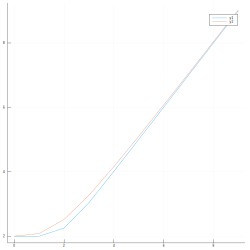

In [116]:
using Plots
u3(t) = (t^3 + 8)^(1/3) #true solution
u3prime(t,u) = (t^2)/(u^2)
t, I = backward_Euler(u3prime,0,10,2,1)
plot(t,I,size=(1000,1000))
plot!(t,u3,size=(1000,1000))

In [117]:
vecnorm(u3.(t)-I)

0.41638376754567047

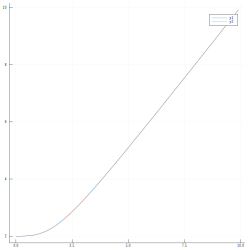

In [118]:
using Plots
t, J = backward_Euler(u3prime,0,10,2,0.1)
plot(t,J,size=(1000,1000))
plot!(t,u3,size=(1000,1000))

In [119]:
vecnorm(u3.(t)-J)

0.13403463362024184

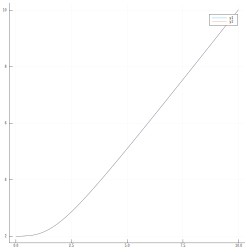

In [120]:
using Plots
t, B = backward_Euler(u3prime,0,10,2,0.01)
plot(t,B,size=(1000,1000))
plot!(t,u3,size=(1000,1000))

In [121]:
vecnorm(u3.(t)-B)

0.04247637363284086

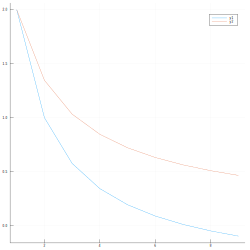

In [122]:
using Plots
u4(t) = (log.(t)+2)/t #true solution
u4prime(t,u) = (log.(t)+1)/(-(t^2))
t, H = backward_Euler(u4prime,1,10,2,1)
plot(t,H,size=(1000,1000))
plot!(t,u4,size=(1000,1000))

In [123]:
vecnorm(u4.(t)-H)

1.4435918231445903

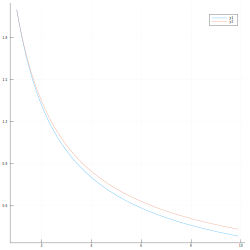

In [124]:
using Plots
t, M = backward_Euler(u4prime,1,10,2,0.1)
plot(t,M,size=(1000,1000))
plot!(t,u4,size=(1000,1000))

In [125]:
vecnorm(u4.(t)-M)

0.40839925699355056

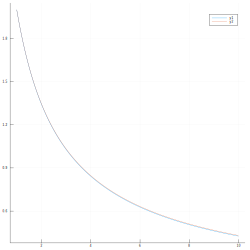

In [126]:
using Plots
t, V = backward_Euler(u4prime,1,10,2,0.01)
plot(t,V,size=(1000,1000))
plot!(t,u4,size=(1000,1000))

In [127]:
vecnorm(u4.(t)-V)

0.127517075853236